In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as f 
from torch.autograd import Variable
torch.backends.cudnn.deterministic = True
import pandas as pd
import numpy as np
import torch.utils.data as data_utils
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random 
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn import manifold
from scipy import stats
from itertools import cycle
import sys
import utilities as ut
from Network import Net
import Network as nn

torch.backends.cudnn.deterministic = True

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True


results = []
num_classes = 2

learning_rate = 0.001
samples = 2000

for epsilon in [0.2]:
    for batch_size in [256]:
        for hidden_size in [100]:
            for EPS1 in [0.005]:
                for n in [10000]:
                    for aux_loss_activated in [False]:
                        for opt in [2]:
                            for t in range(1):
                                train_dataset, test_dataset = ut.load_files(dataset=1)
                                input_size = train_dataset.shape[1]-1                                
                                if n < 50000:
                                    train_dataset = ut.down_sampling(train_dataset)
                                    train_dataset = train_dataset.sample(n)
                                    print(train_dataset)
                                else: 
                                    trainig_dataset_a = train_dataset[train_dataset.label=='ClassA']
                                    print('shape: ', trainig_dataset_a.shape[0])
                                    n2 = n - trainig_dataset_a.shape[0]
                                    print('clase no RR Lrae', n2)
                                    trainig_dataset_b = train_dataset[~(train_dataset.label=='ClassA')].sample(n2)
                                    train_dataset = pd.concat([trainig_dataset_a, trainig_dataset_b])
                                
                                train_dataset, test_dataset = ut.delete_outliers(train_dataset, test_dataset)

                                train_dataset = ut.sort_columns(train_dataset)
                                test_dataset = ut.sort_columns(test_dataset)
                                #... normalize ...
                                train_dataset, test_dataset = ut.normalize(train_dataset, test_dataset)
                                #print(train_dataset.columns)
                                test_dataset_pred = test_dataset.copy()
                                train_dataset_pred = train_dataset.copy()
                                try:
                                    data_prior = ut.generate_samples(samples, train_dataset, epsilon,  option = opt)

                                    train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.2, random_state=42)

                                    train_dataset_prior, val_dataset_prior = train_test_split(data_prior, test_size=0.2, random_state=42)
                                    print(train_dataset_prior.columns)


                                    _, _, train_target_prior, train_loader_prior = ut.get_tensors(train_dataset_prior, batch_size)
                                    _, _, val_target_prior, val_loader_prior     = ut.get_tensors(val_dataset_prior, batch_size)
                                    _, _, train_target, train_loader             = ut.get_tensors(train_dataset, batch_size)
                                    _, _, train_target_pred, train_loader_pred   = ut.get_tensors(train_dataset_pred, batch_size)
                                    _, _, val_target, val_loader                 = ut.get_tensors(val_dataset_prior, batch_size)
                                    _, _, test_target, test_loader               = ut.get_tensors(test_dataset, batch_size)
                                    _, _, test_target_pred, test_loader_pred     = ut.get_tensors(test_dataset_pred, batch_size)

                                    net = Net(input_size, hidden_size, hidden_size, num_classes)
                                    net.cuda()

                                    hist_val, hist_train = nn.train(net, train_loader, train_loader_prior, val_loader, test_loader,
                                    EPS1, learning_rate, input_size, aux_loss_activated=aux_loss_activated)

                                    acc_train, recall_train, f1_train = nn.get_results(net, train_loader, input_size)
                                    acc_test, recall_test, f1_test  = nn.get_results(net, test_loader, input_size)
                                    #results.append([acc_train, acc_test,recall_train, recall_test, f1_train, f1_test, epsilon, batch_size, hidden_size, aux_loss_activated, EPS1, n, opt])
                                    #pd.DataFrame(results, columns=['acc_train', 'acc_test','recall_train', 'recall_test','f1_train', 'f1_test',
                                    # 'epsilon', 'batch_size', 'hidden_size',
                                    # 'aux_loss_activated', 'EPS1', 'n', 'opt']).to_csv('(baseline)25-04-2022-results1D.csv')
                                except Exception as error:
                                    print(error) 
                                    print(str(epsilon)+"-"+str(batch_size)+"-"+str(hidden_size)+"-"+str(aux_loss_activated)+"-"+str(EPS1))

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/franciscoperez/anacon

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
downsampling
28847
362654
done downsampling
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std    CAR_mean  \
153094    0.20400         0.000003               1    0.317726   43.383445   
188511    0.54100         0.000000               1    0.154882   28.450391   
210308    0.03650         0.000000              15    0.300000   19.134899   
168509    0.28400         0.222599               1    0.370370   14.532950   
157858    0.22400         0.002620               1    0.346667  214.611128   
...           ...              ...             ...         ...         ...   
36836     0.02100         0.000054               1    0.283333   14.443337   
96492     0.01550         0.226880               1    0.357934  108.465694   
170067    0.29550         0.074452               1    0.330000  305.960483   
139023    0.02125         0.300367               2    0.333333   13.761356   
208852    0.02

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Epochs:  1000
Epoch:  0
training: epoch:  1  loss:  14.480032503604889 -- aux loss:  0.0
validating: epoch:  1  loss:  2.8432974815368652
Epoch:  1
training: epoch:  2  loss:  10.213860720396042 -- aux loss:  0.0
validating: epoch:  2  loss:  2.74798846244812
Epoch:  2
training: epoch:  3  loss:  9.169073611497879 -- aux loss:  0.0
validating: epoch:  3  loss:  2.6170618534088135
Epoch:  3
training: epoch:  4  loss:  8.795378297567368 -- aux loss:  0.0
validating: epoch:  4  loss:  2.4769036173820496
Epoch:  4
training: epoch:  5  loss:  8.584533870220184 -- aux loss:  0.0
validating: epoch:  5  loss:  2.337052881717682
Epoch:  5
training: epoch:  6  loss:  8.462693631649017 -- aux loss:  0.0
validating: epoch:  6  loss:  2.2024322748184204
Epoch:  6
training: epoch:  7  loss:  8.38642942905426 -- aux loss:  0.0
validating: epoch:  7  loss:  2.072265386581421
Epoch:  7
training: epoch:  8  loss:  8.333556056022644 -- aux loss:  0.0
validating: epoch:  8  loss:  1.9509273171424866
Epoch

training: epoch:  45  loss:  8.09989058971405 -- aux loss:  0.0
validating: epoch:  45  loss:  1.2716182470321655
Epoch:  45
training: epoch:  46  loss:  8.099147826433182 -- aux loss:  0.0
validating: epoch:  46  loss:  1.270685076713562
Epoch:  46
training: epoch:  47  loss:  8.098435372114182 -- aux loss:  0.0
validating: epoch:  47  loss:  1.2698121666908264
Epoch:  47
training: epoch:  48  loss:  8.097793161869049 -- aux loss:  0.0
validating: epoch:  48  loss:  1.26900252699852
Epoch:  48
training: epoch:  49  loss:  8.09720003604889 -- aux loss:  0.0
validating: epoch:  49  loss:  1.2682452201843262
Epoch:  49
training: epoch:  50  loss:  8.09663924574852 -- aux loss:  0.0
validating: epoch:  50  loss:  1.267536461353302
The current loss: 1.267536461353302
the_last_loss: 1.2682452201843262
trigger times: 0
recall
tensor(0.9986)
precision
tensor(0.9837)
f1_score
tensor(0.9911)
Accuracy of the network on test objects: 98 %
98.36896
recall
tensor(1.)
precision
tensor(1.)
f1_score
t

training: epoch:  87  loss:  8.076656937599182 -- aux loss:  0.0
validating: epoch:  87  loss:  1.2567594945430756
Epoch:  87
training: epoch:  88  loss:  8.073583424091339 -- aux loss:  0.0
validating: epoch:  88  loss:  1.2566629648208618
Epoch:  88
training: epoch:  89  loss:  8.06989112496376 -- aux loss:  0.0
validating: epoch:  89  loss:  1.2565755546092987
Epoch:  89
training: epoch:  90  loss:  8.066369086503983 -- aux loss:  0.0
validating: epoch:  90  loss:  1.2564777135849
The current loss: 1.2564777135849
the_last_loss: 1.2565755546092987
trigger times: 0
recall
tensor(0.9989)
precision
tensor(0.9854)
f1_score
tensor(0.9921)
Accuracy of the network on test objects: 98 %
98.53562
recall
tensor(1.)
precision
tensor(1.)
f1_score
tensor(1.)
Accuracy of the network on test objects: 100 %
100.0
recall
tensor(0.9653)
precision
tensor(0.6615)
f1_score
tensor(0.7850)
Accuracy of the network on test objects: 66 %
66.146484
sum mask2 - L1:  tensor(5775, device='cuda:0')
sum mask2 - L2

recall
tensor(1.)
precision
tensor(1.)
f1_score
tensor(1.)
Accuracy of the network on test objects: 100 %
100.0
recall
tensor(0.9643)
precision
tensor(0.6638)
f1_score
tensor(0.7863)
Accuracy of the network on test objects: 66 %
66.38059
sum mask2 - L1:  tensor(5775, device='cuda:0')
sum mask2 - L2:  tensor(9512, device='cuda:0')
sum mask2 - L3:  tensor(182, device='cuda:0')
sum mask1 - L1 (aux):  tensor(225, device='cuda:0')
sum mask1 - L2 (aux):  tensor(488, device='cuda:0')
sum mask1 - L3 (aux):  tensor(18, device='cuda:0')
Epoch:  130
training: epoch:  131  loss:  8.05586302280426 -- aux loss:  0.0
validating: epoch:  131  loss:  1.254190981388092
Epoch:  131
training: epoch:  132  loss:  8.055828094482422 -- aux loss:  0.0
validating: epoch:  132  loss:  1.2541650235652924
Epoch:  132
training: epoch:  133  loss:  8.05579274892807 -- aux loss:  0.0
validating: epoch:  133  loss:  1.254140019416809
Epoch:  133
training: epoch:  134  loss:  8.055758088827133 -- aux loss:  0.0
valida

recall
tensor(0.9633)
precision
tensor(0.6661)
f1_score
tensor(0.7876)
Accuracy of the network on test objects: 66 %
66.6092
sum mask2 - L1:  tensor(5775, device='cuda:0')
sum mask2 - L2:  tensor(9512, device='cuda:0')
sum mask2 - L3:  tensor(182, device='cuda:0')
sum mask1 - L1 (aux):  tensor(225, device='cuda:0')
sum mask1 - L2 (aux):  tensor(488, device='cuda:0')
sum mask1 - L3 (aux):  tensor(18, device='cuda:0')
Epoch:  170
training: epoch:  171  loss:  8.04738301038742 -- aux loss:  0.0
validating: epoch:  171  loss:  1.2535247802734375
Epoch:  171
training: epoch:  172  loss:  8.047366619110107 -- aux loss:  0.0
validating: epoch:  172  loss:  1.2535149157047272
Epoch:  172
training: epoch:  173  loss:  8.047350972890854 -- aux loss:  0.0
validating: epoch:  173  loss:  1.2535053193569183
Epoch:  173
training: epoch:  174  loss:  8.047335773706436 -- aux loss:  0.0
validating: epoch:  174  loss:  1.2534960508346558
Epoch:  174
training: epoch:  175  loss:  8.047321408987045 -- au

training: epoch:  211  loss:  8.047002524137497 -- aux loss:  0.0
validating: epoch:  211  loss:  1.25326606631279
Epoch:  211
training: epoch:  212  loss:  8.046997040510178 -- aux loss:  0.0
validating: epoch:  212  loss:  1.2532620429992676
Epoch:  212
training: epoch:  213  loss:  8.046991854906082 -- aux loss:  0.0
validating: epoch:  213  loss:  1.2532580494880676
Epoch:  213
training: epoch:  214  loss:  8.046986818313599 -- aux loss:  0.0
validating: epoch:  214  loss:  1.2532541453838348
Epoch:  214
training: epoch:  215  loss:  8.046981692314148 -- aux loss:  0.0
validating: epoch:  215  loss:  1.2532505095005035
Epoch:  215
training: epoch:  216  loss:  8.04697659611702 -- aux loss:  0.0
validating: epoch:  216  loss:  1.2532468140125275
Epoch:  216
training: epoch:  217  loss:  8.046971708536148 -- aux loss:  0.0
validating: epoch:  217  loss:  1.2532431483268738
Epoch:  217
training: epoch:  218  loss:  8.046966880559921 -- aux loss:  0.0
validating: epoch:  218  loss:  1.

training: epoch:  253  loss:  8.046848893165588 -- aux loss:  0.0
validating: epoch:  253  loss:  1.253149688243866
Epoch:  253
training: epoch:  254  loss:  8.046846479177475 -- aux loss:  0.0
validating: epoch:  254  loss:  1.2531480193138123
Epoch:  254
training: epoch:  255  loss:  8.046844124794006 -- aux loss:  0.0
validating: epoch:  255  loss:  1.253146231174469
Epoch:  255
training: epoch:  256  loss:  8.046841770410538 -- aux loss:  0.0
validating: epoch:  256  loss:  1.2531445622444153
Epoch:  256
training: epoch:  257  loss:  8.046839594841003 -- aux loss:  0.0
validating: epoch:  257  loss:  1.253142923116684
Epoch:  257
training: epoch:  258  loss:  8.046837538480759 -- aux loss:  0.0
validating: epoch:  258  loss:  1.2531412541866302
Epoch:  258
training: epoch:  259  loss:  8.046835452318192 -- aux loss:  0.0
validating: epoch:  259  loss:  1.2531395256519318
Epoch:  259
training: epoch:  260  loss:  8.04683330655098 -- aux loss:  0.0
validating: epoch:  260  loss:  1.2

training: epoch:  298  loss:  8.04677665233612 -- aux loss:  0.0
validating: epoch:  298  loss:  1.2530943155288696
Epoch:  298
training: epoch:  299  loss:  8.04677551984787 -- aux loss:  0.0
validating: epoch:  299  loss:  1.2530934512615204
Epoch:  299
training: epoch:  300  loss:  8.046774595975876 -- aux loss:  0.0
validating: epoch:  300  loss:  1.2530925869941711
The current loss: 1.2530925869941711
the_last_loss: 1.2530934512615204
trigger times: 0
recall
tensor(0.9989)
precision
tensor(0.9862)
f1_score
tensor(0.9925)
Accuracy of the network on test objects: 98 %
98.61894
recall
tensor(1.)
precision
tensor(1.)
f1_score
tensor(1.)
Accuracy of the network on test objects: 100 %
100.0
recall
tensor(0.9643)
precision
tensor(0.6674)
f1_score
tensor(0.7888)
Accuracy of the network on test objects: 66 %
66.741455
sum mask2 - L1:  tensor(5775, device='cuda:0')
sum mask2 - L2:  tensor(9512, device='cuda:0')
sum mask2 - L3:  tensor(182, device='cuda:0')
sum mask1 - L1 (aux):  tensor(225,

training: epoch:  339  loss:  8.046745717525482 -- aux loss:  0.0
validating: epoch:  339  loss:  1.253070741891861
Epoch:  339
training: epoch:  340  loss:  8.046745210886002 -- aux loss:  0.0
validating: epoch:  340  loss:  1.2530702948570251
The current loss: 1.2530702948570251
the_last_loss: 1.253070741891861
trigger times: 0
recall
tensor(0.9989)
precision
tensor(0.9862)
f1_score
tensor(0.9925)
Accuracy of the network on test objects: 98 %
98.61894
recall
tensor(1.)
precision
tensor(1.)
f1_score
tensor(1.)
Accuracy of the network on test objects: 100 %
100.0
recall
tensor(0.9642)
precision
tensor(0.6677)
f1_score
tensor(0.7890)
Accuracy of the network on test objects: 66 %
66.76643
sum mask2 - L1:  tensor(5775, device='cuda:0')
sum mask2 - L2:  tensor(9512, device='cuda:0')
sum mask2 - L3:  tensor(182, device='cuda:0')
sum mask1 - L1 (aux):  tensor(225, device='cuda:0')
sum mask1 - L2 (aux):  tensor(488, device='cuda:0')
sum mask1 - L3 (aux):  tensor(18, device='cuda:0')
Epoch:  3

recall
tensor(0.9989)
precision
tensor(0.9862)
f1_score
tensor(0.9925)
Accuracy of the network on test objects: 98 %
98.61894
recall
tensor(1.)
precision
tensor(1.)
f1_score
tensor(1.)
Accuracy of the network on test objects: 100 %
100.0
recall
tensor(0.9643)
precision
tensor(0.6679)
f1_score
tensor(0.7892)
Accuracy of the network on test objects: 66 %
66.79332
sum mask2 - L1:  tensor(5775, device='cuda:0')
sum mask2 - L2:  tensor(9512, device='cuda:0')
sum mask2 - L3:  tensor(182, device='cuda:0')
sum mask1 - L1 (aux):  tensor(225, device='cuda:0')
sum mask1 - L2 (aux):  tensor(488, device='cuda:0')
sum mask1 - L3 (aux):  tensor(18, device='cuda:0')
Epoch:  380
training: epoch:  381  loss:  8.046730071306229 -- aux loss:  0.0
validating: epoch:  381  loss:  1.2530587315559387
Epoch:  381
training: epoch:  382  loss:  8.046729862689972 -- aux loss:  0.0
validating: epoch:  382  loss:  1.2530585527420044
Epoch:  382
training: epoch:  383  loss:  8.046729445457458 -- aux loss:  0.0
valid

recall
tensor(0.9646)
precision
tensor(0.6681)
f1_score
tensor(0.7895)
Accuracy of the network on test objects: 66 %
66.81444
sum mask2 - L1:  tensor(5775, device='cuda:0')
sum mask2 - L2:  tensor(9512, device='cuda:0')
sum mask2 - L3:  tensor(182, device='cuda:0')
sum mask1 - L1 (aux):  tensor(225, device='cuda:0')
sum mask1 - L2 (aux):  tensor(488, device='cuda:0')
sum mask1 - L3 (aux):  tensor(18, device='cuda:0')
Epoch:  420
training: epoch:  421  loss:  8.046722441911697 -- aux loss:  0.0
validating: epoch:  421  loss:  1.2530530989170074
Epoch:  421
training: epoch:  422  loss:  8.046722292900085 -- aux loss:  0.0
validating: epoch:  422  loss:  1.2530529499053955
Epoch:  422
training: epoch:  423  loss:  8.046722143888474 -- aux loss:  0.0
validating: epoch:  423  loss:  1.253052830696106
Epoch:  423
training: epoch:  424  loss:  8.046722024679184 -- aux loss:  0.0
validating: epoch:  424  loss:  1.2530527114868164
Epoch:  424
training: epoch:  425  loss:  8.046721935272217 -- a

training: epoch:  462  loss:  8.046718448400497 -- aux loss:  0.0
validating: epoch:  462  loss:  1.2530502676963806
Epoch:  462
training: epoch:  463  loss:  8.046718448400497 -- aux loss:  0.0
validating: epoch:  463  loss:  1.2530502378940582
Epoch:  463
training: epoch:  464  loss:  8.04671835899353 -- aux loss:  0.0
validating: epoch:  464  loss:  1.2530501782894135
Epoch:  464
training: epoch:  465  loss:  8.046718299388885 -- aux loss:  0.0
validating: epoch:  465  loss:  1.253050148487091
Epoch:  465
training: epoch:  466  loss:  8.04671823978424 -- aux loss:  0.0
validating: epoch:  466  loss:  1.2530501186847687
Epoch:  466
training: epoch:  467  loss:  8.046718209981918 -- aux loss:  0.0
validating: epoch:  467  loss:  1.2530499994754791
Epoch:  467
training: epoch:  468  loss:  8.046718209981918 -- aux loss:  0.0
validating: epoch:  468  loss:  1.253049910068512
Epoch:  468
training: epoch:  469  loss:  8.046718150377274 -- aux loss:  0.0
validating: epoch:  469  loss:  1.2

training: epoch:  505  loss:  8.046716570854187 -- aux loss:  0.0
validating: epoch:  505  loss:  1.2530483305454254
Epoch:  505
training: epoch:  506  loss:  8.046716541051865 -- aux loss:  0.0
validating: epoch:  506  loss:  1.2530482709407806
Epoch:  506
training: epoch:  507  loss:  8.046716451644897 -- aux loss:  0.0
validating: epoch:  507  loss:  1.2530482709407806
Epoch:  507
training: epoch:  508  loss:  8.046716392040253 -- aux loss:  0.0
validating: epoch:  508  loss:  1.253048300743103
Epoch:  508
training: epoch:  509  loss:  8.046716392040253 -- aux loss:  0.0
validating: epoch:  509  loss:  1.2530482411384583
Epoch:  509
training: epoch:  510  loss:  8.046716332435608 -- aux loss:  0.0
validating: epoch:  510  loss:  1.2530482113361359
The current loss: 1.2530482113361359
the_last_loss: 1.2530482411384583
trigger times: 0
recall
tensor(0.9989)
precision
tensor(0.9862)
f1_score
tensor(0.9925)
Accuracy of the network on test objects: 98 %
98.61894
recall
tensor(1.)
precisi

training: epoch:  547  loss:  8.046715378761292 -- aux loss:  0.0
validating: epoch:  547  loss:  1.2530477941036224
Epoch:  547
training: epoch:  548  loss:  8.04671534895897 -- aux loss:  0.0
validating: epoch:  548  loss:  1.2530477941036224
Epoch:  548
training: epoch:  549  loss:  8.046715289354324 -- aux loss:  0.0
validating: epoch:  549  loss:  1.2530478239059448
Epoch:  549
training: epoch:  550  loss:  8.046715289354324 -- aux loss:  0.0
validating: epoch:  550  loss:  1.2530478239059448
The current loss: 1.2530478239059448
the_last_loss: 1.2530478239059448
trigger times: 0
recall
tensor(0.9989)
precision
tensor(0.9862)
f1_score
tensor(0.9925)
Accuracy of the network on test objects: 98 %
98.61894
recall
tensor(1.)
precision
tensor(1.)
f1_score
tensor(1.)
Accuracy of the network on test objects: 100 %
100.0
recall
tensor(0.9647)
precision
tensor(0.6685)
f1_score
tensor(0.7897)
Accuracy of the network on test objects: 66 %
66.85099
sum mask2 - L1:  tensor(5775, device='cuda:0'

training: epoch:  589  loss:  8.0467149913311 -- aux loss:  0.0
validating: epoch:  589  loss:  1.2530473172664642
Epoch:  589
training: epoch:  590  loss:  8.0467149913311 -- aux loss:  0.0
validating: epoch:  590  loss:  1.2530472874641418
The current loss: 1.2530472874641418
the_last_loss: 1.2530473172664642
trigger times: 0
recall
tensor(0.9989)
precision
tensor(0.9862)
f1_score
tensor(0.9925)
Accuracy of the network on test objects: 98 %
98.61894
recall
tensor(1.)
precision
tensor(1.)
f1_score
tensor(1.)
Accuracy of the network on test objects: 100 %
100.0
recall
tensor(0.9648)
precision
tensor(0.6685)
f1_score
tensor(0.7898)
Accuracy of the network on test objects: 66 %
66.854805
sum mask2 - L1:  tensor(5775, device='cuda:0')
sum mask2 - L2:  tensor(9512, device='cuda:0')
sum mask2 - L3:  tensor(182, device='cuda:0')
sum mask1 - L1 (aux):  tensor(225, device='cuda:0')
sum mask1 - L2 (aux):  tensor(488, device='cuda:0')
sum mask1 - L3 (aux):  tensor(18, device='cuda:0')
Epoch:  59

validating: epoch:  630  loss:  1.253047227859497
The current loss: 1.253047227859497
the_last_loss: 1.2530472576618195
trigger times: 0
recall
tensor(0.9989)
precision
tensor(0.9862)
f1_score
tensor(0.9925)
Accuracy of the network on test objects: 98 %
98.61894
recall
tensor(1.)
precision
tensor(1.)
f1_score
tensor(1.)
Accuracy of the network on test objects: 100 %
100.0
recall
tensor(0.9650)
precision
tensor(0.6689)
f1_score
tensor(0.7901)
Accuracy of the network on test objects: 66 %
66.88558
sum mask2 - L1:  tensor(5775, device='cuda:0')
sum mask2 - L2:  tensor(9512, device='cuda:0')
sum mask2 - L3:  tensor(182, device='cuda:0')
sum mask1 - L1 (aux):  tensor(225, device='cuda:0')
sum mask1 - L2 (aux):  tensor(488, device='cuda:0')
sum mask1 - L3 (aux):  tensor(18, device='cuda:0')
Epoch:  630
training: epoch:  631  loss:  8.046714633703232 -- aux loss:  0.0
validating: epoch:  631  loss:  1.253047227859497
Epoch:  631
training: epoch:  632  loss:  8.046714633703232 -- aux loss:  0.

training: epoch:  672  loss:  8.046714544296265 -- aux loss:  0.0
validating: epoch:  672  loss:  1.2530469298362732
Epoch:  672
training: epoch:  673  loss:  8.046714544296265 -- aux loss:  0.0
validating: epoch:  673  loss:  1.2530469298362732
Epoch:  673
training: epoch:  674  loss:  8.046714544296265 -- aux loss:  0.0
validating: epoch:  674  loss:  1.2530469000339508
Epoch:  674
training: epoch:  675  loss:  8.046714544296265 -- aux loss:  0.0
validating: epoch:  675  loss:  1.2530468702316284
Epoch:  675
training: epoch:  676  loss:  8.046714544296265 -- aux loss:  0.0
validating: epoch:  676  loss:  1.2530468702316284
Epoch:  676
training: epoch:  677  loss:  8.046714514493942 -- aux loss:  0.0
validating: epoch:  677  loss:  1.253046840429306
Epoch:  677
training: epoch:  678  loss:  8.046714514493942 -- aux loss:  0.0
validating: epoch:  678  loss:  1.253046840429306
Epoch:  678
training: epoch:  679  loss:  8.046714514493942 -- aux loss:  0.0
validating: epoch:  679  loss:  1

training: epoch:  715  loss:  8.046714425086975 -- aux loss:  0.0
validating: epoch:  715  loss:  1.2530468106269836
Epoch:  715
training: epoch:  716  loss:  8.046714425086975 -- aux loss:  0.0
validating: epoch:  716  loss:  1.2530468106269836
Epoch:  716
training: epoch:  717  loss:  8.046714425086975 -- aux loss:  0.0
validating: epoch:  717  loss:  1.2530468106269836
Epoch:  717
training: epoch:  718  loss:  8.046714425086975 -- aux loss:  0.0
validating: epoch:  718  loss:  1.2530468106269836
Epoch:  718
training: epoch:  719  loss:  8.046714425086975 -- aux loss:  0.0
validating: epoch:  719  loss:  1.2530468106269836
Epoch:  719
training: epoch:  720  loss:  8.046714425086975 -- aux loss:  0.0
validating: epoch:  720  loss:  1.2530468106269836
The current loss: 1.2530468106269836
the_last_loss: 1.2530468106269836
trigger times: 0
recall
tensor(0.9989)
precision
tensor(0.9862)
f1_score
tensor(0.9925)
Accuracy of the network on test objects: 98 %
98.61894
recall
tensor(1.)
precis

training: epoch:  756  loss:  8.04671436548233 -- aux loss:  0.0
validating: epoch:  756  loss:  1.2530467808246613
Epoch:  756
training: epoch:  757  loss:  8.04671436548233 -- aux loss:  0.0
validating: epoch:  757  loss:  1.2530467808246613
Epoch:  757
training: epoch:  758  loss:  8.04671436548233 -- aux loss:  0.0
validating: epoch:  758  loss:  1.2530467808246613
Epoch:  758
training: epoch:  759  loss:  8.04671436548233 -- aux loss:  0.0
validating: epoch:  759  loss:  1.2530467510223389
Epoch:  759
training: epoch:  760  loss:  8.04671436548233 -- aux loss:  0.0
validating: epoch:  760  loss:  1.2530467510223389
The current loss: 1.2530467510223389
the_last_loss: 1.2530467510223389
trigger times: 0
recall
tensor(0.9989)
precision
tensor(0.9862)
f1_score
tensor(0.9925)
Accuracy of the network on test objects: 98 %
98.61894
recall
tensor(1.)
precision
tensor(1.)
f1_score
tensor(1.)
Accuracy of the network on test objects: 100 %
100.0
recall
tensor(0.9649)
precision
tensor(0.6688)

training: epoch:  797  loss:  8.046714305877686 -- aux loss:  0.0
validating: epoch:  797  loss:  1.2530465722084045
Epoch:  797
training: epoch:  798  loss:  8.046714305877686 -- aux loss:  0.0
validating: epoch:  798  loss:  1.2530465722084045
Epoch:  798
training: epoch:  799  loss:  8.046714305877686 -- aux loss:  0.0
validating: epoch:  799  loss:  1.2530465722084045
Epoch:  799
training: epoch:  800  loss:  8.046714305877686 -- aux loss:  0.0
validating: epoch:  800  loss:  1.2530465722084045
The current loss: 1.2530465722084045
the_last_loss: 1.2530465722084045
trigger times: 0
recall
tensor(0.9989)
precision
tensor(0.9862)
f1_score
tensor(0.9925)
Accuracy of the network on test objects: 98 %
98.61894
recall
tensor(1.)
precision
tensor(1.)
f1_score
tensor(1.)
Accuracy of the network on test objects: 100 %
100.0
recall
tensor(0.9649)
precision
tensor(0.6689)
f1_score
tensor(0.7901)
Accuracy of the network on test objects: 66 %
66.887535
sum mask2 - L1:  tensor(5775, device='cuda:

training: epoch:  840  loss:  8.046714276075363 -- aux loss:  0.0
validating: epoch:  840  loss:  1.2530465126037598
The current loss: 1.2530465126037598
the_last_loss: 1.2530465126037598
trigger times: 0
recall
tensor(0.9989)
precision
tensor(0.9862)
f1_score
tensor(0.9925)
Accuracy of the network on test objects: 98 %
98.61894
recall
tensor(1.)
precision
tensor(1.)
f1_score
tensor(1.)
Accuracy of the network on test objects: 100 %
100.0
recall
tensor(0.9648)
precision
tensor(0.6687)
f1_score
tensor(0.7900)
Accuracy of the network on test objects: 66 %
66.87406
sum mask2 - L1:  tensor(5775, device='cuda:0')
sum mask2 - L2:  tensor(9512, device='cuda:0')
sum mask2 - L3:  tensor(182, device='cuda:0')
sum mask1 - L1 (aux):  tensor(225, device='cuda:0')
sum mask1 - L2 (aux):  tensor(488, device='cuda:0')
sum mask1 - L3 (aux):  tensor(18, device='cuda:0')
Epoch:  840
training: epoch:  841  loss:  8.046714276075363 -- aux loss:  0.0
validating: epoch:  841  loss:  1.2530465126037598
Epoch: 

recall
tensor(0.9649)
precision
tensor(0.6690)
f1_score
tensor(0.7901)
Accuracy of the network on test objects: 66 %
66.89524
sum mask2 - L1:  tensor(5775, device='cuda:0')
sum mask2 - L2:  tensor(9512, device='cuda:0')
sum mask2 - L3:  tensor(182, device='cuda:0')
sum mask1 - L1 (aux):  tensor(225, device='cuda:0')
sum mask1 - L2 (aux):  tensor(488, device='cuda:0')
sum mask1 - L3 (aux):  tensor(18, device='cuda:0')
Epoch:  880
training: epoch:  881  loss:  8.046714276075363 -- aux loss:  0.0
validating: epoch:  881  loss:  1.2530465126037598
Epoch:  881
training: epoch:  882  loss:  8.046714276075363 -- aux loss:  0.0
validating: epoch:  882  loss:  1.2530465126037598
Epoch:  882
training: epoch:  883  loss:  8.046714276075363 -- aux loss:  0.0
validating: epoch:  883  loss:  1.2530465126037598
Epoch:  883
training: epoch:  884  loss:  8.046714276075363 -- aux loss:  0.0
validating: epoch:  884  loss:  1.2530465126037598
Epoch:  884
training: epoch:  885  loss:  8.046714276075363 -- 

training: epoch:  922  loss:  8.046714216470718 -- aux loss:  0.0
validating: epoch:  922  loss:  1.2530465126037598
Epoch:  922
training: epoch:  923  loss:  8.046714216470718 -- aux loss:  0.0
validating: epoch:  923  loss:  1.2530465126037598
Epoch:  923
training: epoch:  924  loss:  8.046714216470718 -- aux loss:  0.0
validating: epoch:  924  loss:  1.2530465126037598
Epoch:  924
training: epoch:  925  loss:  8.046714216470718 -- aux loss:  0.0
validating: epoch:  925  loss:  1.2530465126037598
Epoch:  925
training: epoch:  926  loss:  8.046714216470718 -- aux loss:  0.0
validating: epoch:  926  loss:  1.2530465126037598
Epoch:  926
training: epoch:  927  loss:  8.046714216470718 -- aux loss:  0.0
validating: epoch:  927  loss:  1.2530465126037598
Epoch:  927
training: epoch:  928  loss:  8.046714216470718 -- aux loss:  0.0
validating: epoch:  928  loss:  1.2530465126037598
Epoch:  928
training: epoch:  929  loss:  8.046714216470718 -- aux loss:  0.0
validating: epoch:  929  loss: 

training: epoch:  964  loss:  8.046714216470718 -- aux loss:  0.0
validating: epoch:  964  loss:  1.2530465126037598
Epoch:  964
training: epoch:  965  loss:  8.046714216470718 -- aux loss:  0.0
validating: epoch:  965  loss:  1.2530465126037598
Epoch:  965
training: epoch:  966  loss:  8.046714216470718 -- aux loss:  0.0
validating: epoch:  966  loss:  1.2530465126037598
Epoch:  966
training: epoch:  967  loss:  8.046714216470718 -- aux loss:  0.0
validating: epoch:  967  loss:  1.2530465126037598
Epoch:  967
training: epoch:  968  loss:  8.046714216470718 -- aux loss:  0.0
validating: epoch:  968  loss:  1.2530465126037598
Epoch:  968
training: epoch:  969  loss:  8.046714216470718 -- aux loss:  0.0
validating: epoch:  969  loss:  1.2530465126037598
Epoch:  969
training: epoch:  970  loss:  8.046714216470718 -- aux loss:  0.0
validating: epoch:  970  loss:  1.2530465126037598
The current loss: 1.2530465126037598
the_last_loss: 1.2530465126037598
trigger times: 0
recall
tensor(0.9989)

In [2]:
nn.get_results(net, train_loader, input_size)
nn.get_results(net, test_loader, input_size)

recall
tensor(0.9989)
precision
tensor(0.9862)
f1_score
tensor(0.9925)
Accuracy of the network on test objects: 98 %
98.61894
recall
tensor(0.9648)
precision
tensor(0.6686)
f1_score
tensor(0.7899)
Accuracy of the network on test objects: 66 %
66.8625


(array(66.8625, dtype=float32),
 array(0.9648408, dtype=float32),
 array(0.7898748, dtype=float32))

In [3]:
torch.save(net.state_dict(), 'model.pkl')

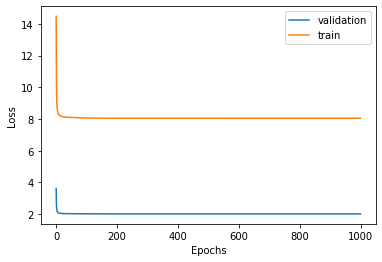

In [4]:
plt.plot(hist_val, label ='validation')
plt.plot(hist_train, label ='train')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.savefig('images/'+str(samples)+'_'+str(epsilon)+'_'+str(n)+"_"+str(hidden_size)+"_Loss_Training.png")
plt.show()

1.0


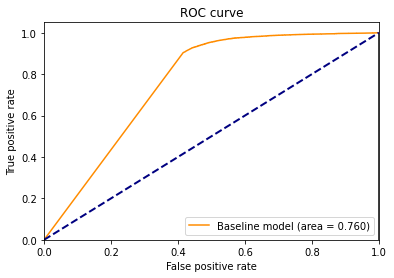

In [5]:
nn.get_roc_curve(net, test_loader, input_size)

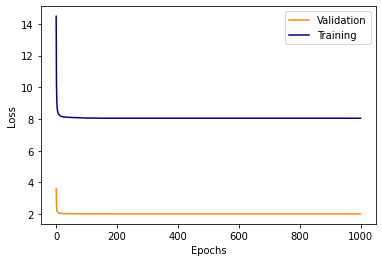

In [6]:
ut.plot_training(hist_val, hist_train)

In [7]:
#csv_file = open("size_MLP_noise.csv", "a")
#csv_file.write(str(np.asarray(acc_testing))+","+str(np.asarray(acc_training))+","+str(samples)+","+str(epsilon)+","+str(n)+","+str(hidden_size)+"\n")
#csv_file.close()

In [8]:
outputs, intermediates, intermediates2, labels = ut.get_representations(net, train_loader, device)
outputs_test, intermediates_test, intermediates2_test, labels_test = ut.get_representations(net, test_loader, device)

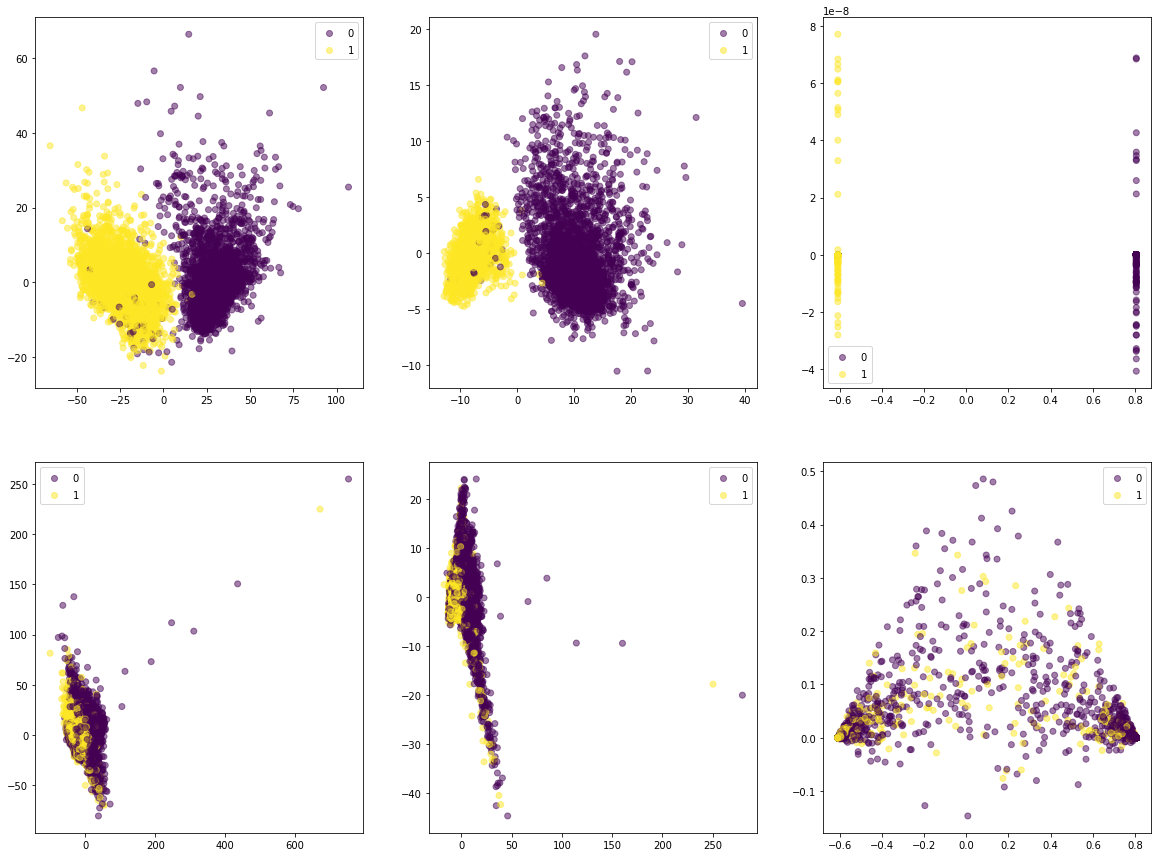

In [9]:
intermediate_pca_data, intermediate_pca_data_test = ut.get_pca(intermediates, data_test=intermediates_test)
fig, axs = plt.subplots(2, 3, figsize=(20,15))
ut.plot_representations(intermediate_pca_data, labels, axs[0, 0])
ut.plot_representations(intermediate_pca_data_test, labels_test, axs[1, 0])
intermediate2_pca_data, intermediate2_pca_data_test = ut.get_pca(intermediates2, data_test=intermediates2_test)
ut.plot_representations(intermediate2_pca_data, labels, axs[0, 1])
ut.plot_representations(intermediate2_pca_data_test, labels_test, axs[1, 1])
output_pca_data, output_pca_data_test = ut.get_pca(outputs, data_test=outputs_test)
ut.plot_representations(output_pca_data, labels, axs[0, 2])
ut.plot_representations(output_pca_data_test, labels_test, axs[1, 2])

first
first ..
first ...


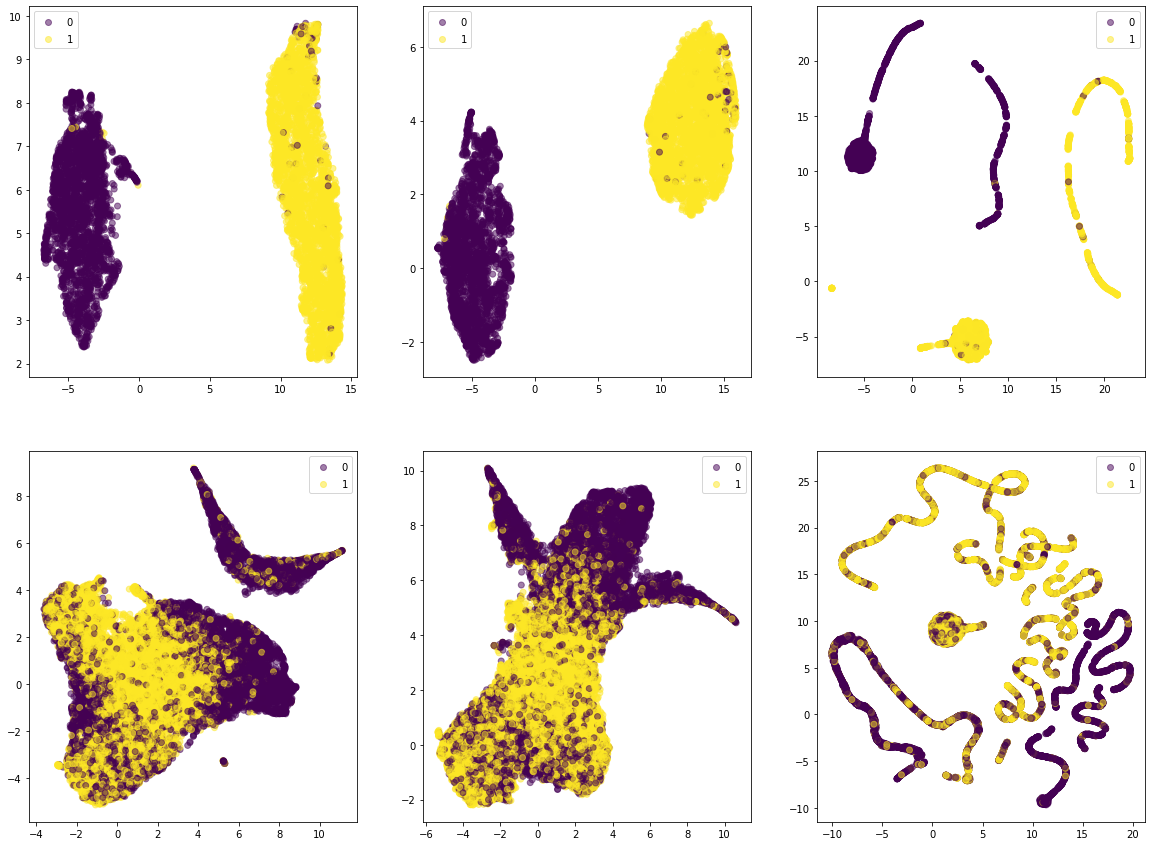

In [10]:
import umap

fig, axs = plt.subplots(2, 3, figsize=(20,15))
print('first')
reducer = umap.UMAP()
print('first ..')
mapper_train = reducer.fit_transform(intermediates.numpy())
print('first ...')
reducer = umap.UMAP()
mapper_test = reducer.fit_transform(intermediates_test.numpy())
ut.plot_representations(mapper_train, labels, axs[0, 0])
ut.plot_representations(mapper_test, labels_test, axs[1, 0])

reducer = umap.UMAP()
mapper_train = reducer.fit_transform(intermediates2.numpy())
reducer = umap.UMAP()
mapper_test = reducer.fit_transform(intermediates2_test.numpy())
ut.plot_representations(mapper_train, labels, axs[0, 1])
ut.plot_representations(mapper_test, labels_test, axs[1, 1])

reducer = umap.UMAP()
mapper_train = reducer.fit_transform(outputs.numpy())
reducer = umap.UMAP()
mapper_test = reducer.fit_transform(outputs_test.numpy())

ut.plot_representations(mapper_train, labels, axs[0, 2])
ut.plot_representations(mapper_test, labels_test, axs[1, 2])

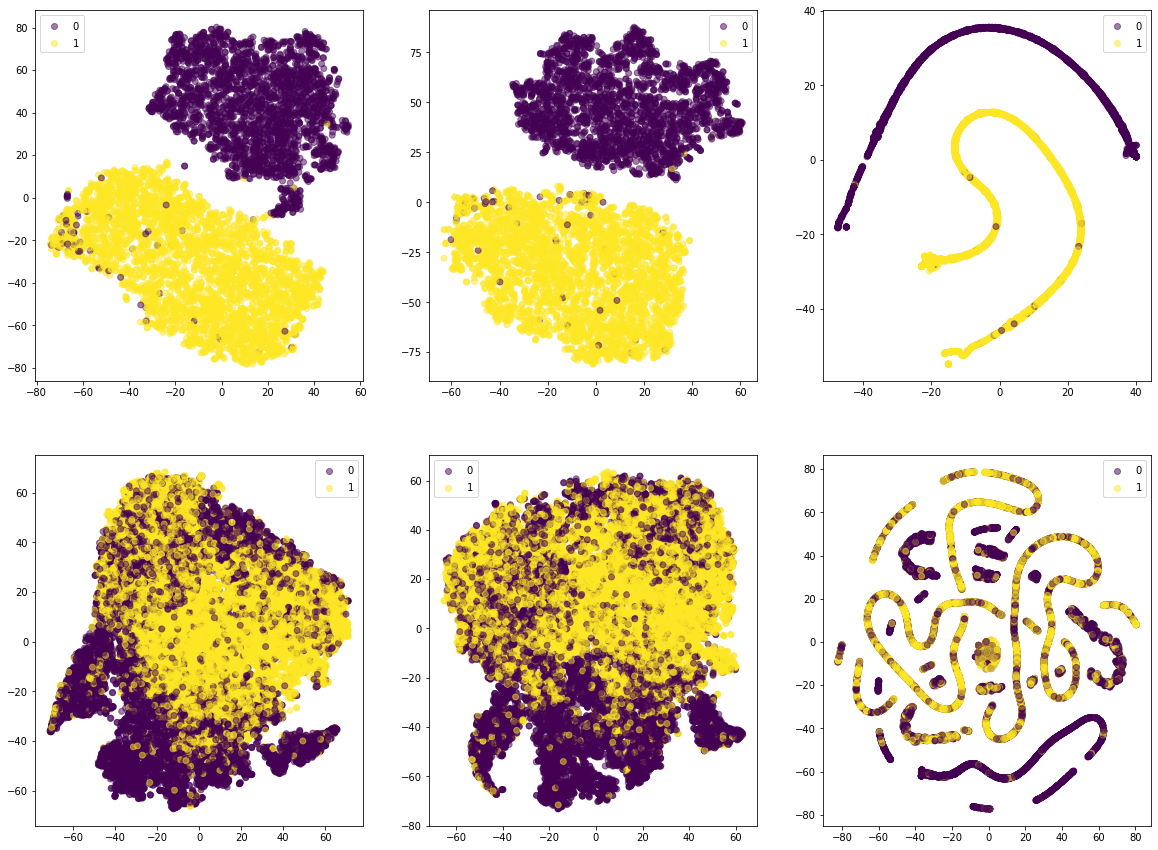

In [11]:
N_CURVES = 25000

fig, axs = plt.subplots(2, 3, figsize=(20,15))
intermediate_tsne_data, intermediate_tsne_data_test = ut.get_tsne(intermediates, data_test= intermediates_test, n_curves = N_CURVES)
ut.plot_representations(intermediate_tsne_data, labels, axs[0, 0],  n_curves = N_CURVES)
ut.plot_representations(intermediate_tsne_data_test, labels_test, axs[1, 0], n_curves = N_CURVES)

intermediate2_tsne_data, intermediate2_tsne_data_test = ut.get_tsne(intermediates2, data_test=intermediates2_test, n_curves = N_CURVES)
ut.plot_representations(intermediate2_tsne_data, labels, axs[0, 1], n_curves = N_CURVES)
ut.plot_representations(intermediate2_tsne_data_test, labels_test, axs[1, 1], n_curves = N_CURVES)

output_tsne_data, output2_tsne_data_test = ut.get_tsne(outputs, data_test=outputs_test, n_curves = N_CURVES)
ut.plot_representations(output_tsne_data, labels, axs[0, 2], n_curves = N_CURVES)
ut.plot_representations(output2_tsne_data_test, labels_test, axs[1, 2], n_curves = N_CURVES)

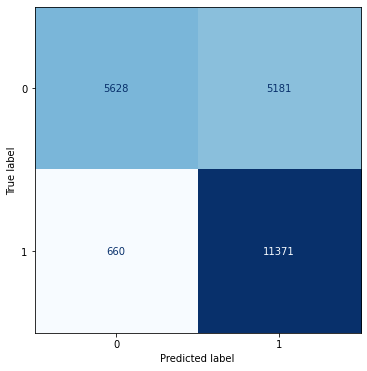

In [12]:
#fig, ax = plt.subplots(1, 1, figsize=(15,15))
#curves, labels, probs_train = ut.get_predictions(net, train_loader_pred, device)
#pred_labels = probs_train.argmax(1, keepdim = True)
#ut.plot_confusion_matrix(np.round(labels), pred_labels, ax)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
curves, labels, probs_test = ut.get_predictions(net, test_loader_pred, device)
pred_labels = (probs_test[:,1] > 0.7305).float() * 1 #probs_test.argmax(1, keepdim = True)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax)

(array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([0.26894143, 0.31515315, 0.36136487, 0.4075766 , 0.4537883 ,
        0.5       , 0.5462117 , 0.59242344, 0.63863516, 0.6848469 ,
        0.7310586 ], dtype=float32),
 <a list of 22840 BarContainer objects>)

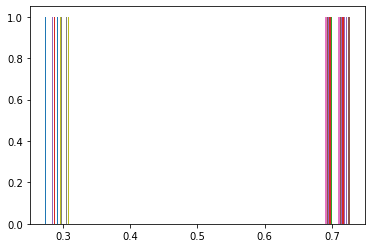

In [13]:
plt.hist(probs_test[:,1])

In [14]:
curves, labels, probs_train_sample = ut.get_predictions(net, train_loader, device)

In [15]:
#N_WEIGHTS = 25
#weights = net.fc2.weight.data
#plot_weights(weights, N_WEIGHTS)

In [16]:
weights1 = net.fc1.weight.data
w1 = weights1.cpu().numpy().reshape(-1,1)
weights2 = net.fc2.weight.data
w2 = weights2.cpu().numpy().reshape(-1,1)
weights3 = net.fc3.weight.data
w3 = weights3.cpu().numpy().reshape(-1,1)

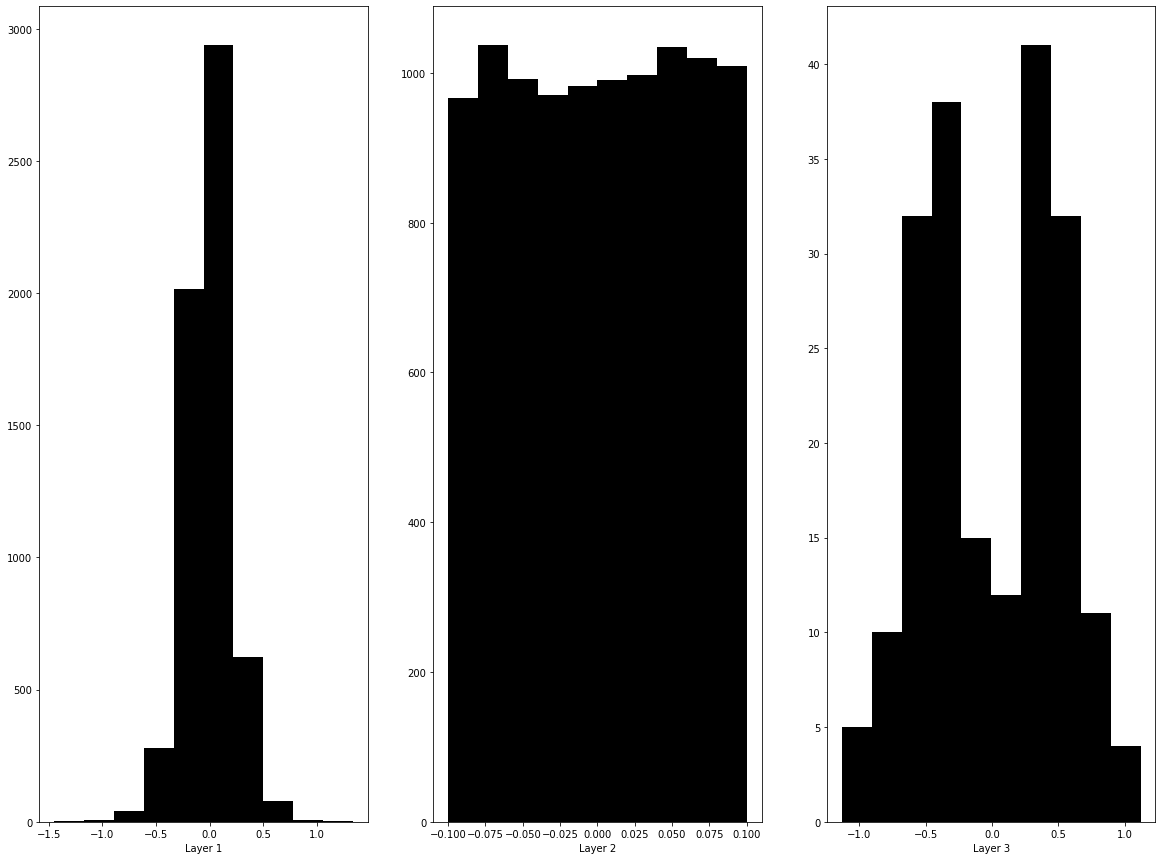

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,15))
ax1.hist(w1, color='black')
ax1.set_xlabel('Layer 1')
ax2.hist(w2, color='black')
ax2.set_xlabel('Layer 2')
ax3.hist(w3, color='black')
ax3.set_xlabel('Layer 3')
plt.show()

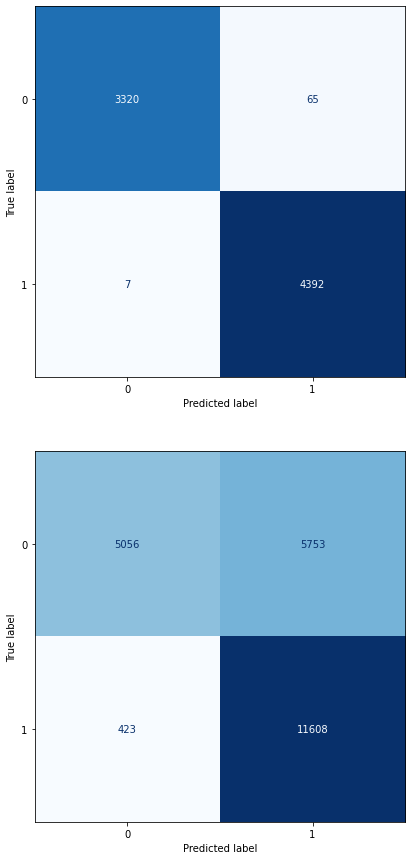

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
curves, labels, probs_train = ut.get_predictions(net, train_loader_pred, device)
pred_labels = torch.argmax(probs_train, 1)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax1)
curves, labels, probs_test = ut.get_predictions(net, test_loader_pred, device)
pred_labels = torch.argmax(probs_test, 1)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax2)